## Table Of Contents:  <a class="top" id="TOP"></a>
* [Airports](#air)
* [Weather](#weath)
* [Flights](#fly)
* [Planes](#plane)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import seaborn as sns

In [161]:
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')
planes = pd.read_csv('planes.csv')
weather = pd.read_csv('weather.csv')

# Airports  <a class="anchor" id="air"></a>

[Back To Top](#TOP)

In [10]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


### Get to know Null values

In [11]:
airports.isnull().sum(), airports.shape

(iata        0
 airport     0
 city       12
 state      12
 country     0
 lat         0
 long        0
 dtype: int64, (3376, 7))

### Clear nulls

In [12]:
airports.dropna(axis = 0, inplace = True)

### As I searched, `iata` attribute is nothing more than a code (an International one)  

### for Air Transport Association indicating the city and the country of the airport.  

### So, we can safely drop it and nothing would change

In [29]:
airports.drop(columns = ['iata'], inplace = True)

### Now `airports` dataset is clean

In [30]:
airports.isnull().sum(), airports.shape

(airport    0
 city       0
 state      0
 country    0
 lat        0
 long       0
 dtype: int64, (3364, 6))

### Distribution of the `airports` (red) around `USA`

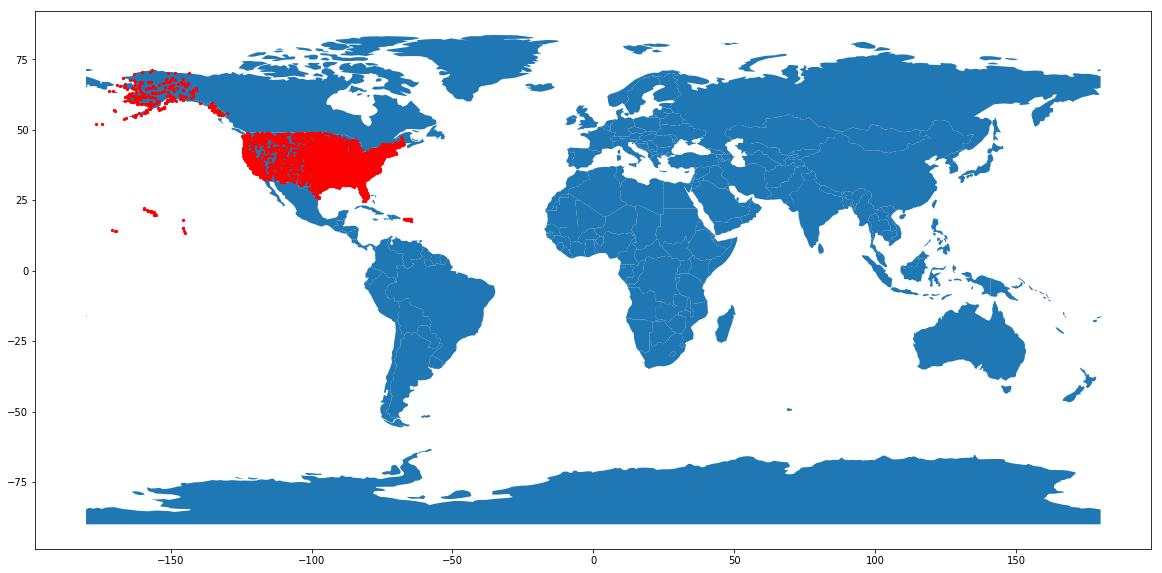

In [39]:
geometry = [Point(xy) for xy in zip(airports['long'], airports['lat'])]
gdf = GeoDataFrame(airports, geometry=geometry)   
gdf.plot(ax=world.plot(figsize=(20, 20)), marker='o', color='red', markersize=5)

# Weather  <a class="anchor" id="weath"></a>

[Back To Top](#TOP)

In [40]:
weather.head()

,date,hour,temp,dew_point,humidity,pressure,visibility,wind_dir,wind_dir2,wind_speed,conditions
0,2011-01-01,0,59.0000,28.900000,32.000000,29.86,10.0,NNE,20.0,13.8,Mostly Cloudy
1,2011-01-01,1,57.2000,28.400000,33.000000,29.88,10.0,NNE,20.0,11.5,Mostly Cloudy
2,2011-01-01,2,55.4000,28.400000,36.000000,29.93,10.0,NNW,340.0,12.7,Overcast
3,2011-01-01,3,53.6000,28.400000,38.000000,29.94,10.0,North,350.0,16.1,Overcast
4,2011-01-01,4,71.3227,57.678573,65.911677,29.99,10.0,NNW,340.0,18.4,Unknown


### Get to know Null values

In [15]:
weather.isnull().sum(), weather.shape

(date             0
 hour             0
 temp             5
 dew_point        5
 humidity         5
 pressure         5
 visibility       1
 wind_dir         0
 wind_dir2     1479
 wind_speed    1186
 gust_speed    7272
 precip        8241
 conditions       0
 events        8376
 dtype: int64, (8723, 14))

### Drop columns with almost all null values

In [16]:
columns = ['precip','events', 'gust_speed']
weather.drop(columns = columns, inplace = True)

### Fix null values in those columns by filling them by the mean value

In [17]:
weather['temp'].fillna(weather['temp'].mean(), inplace = True)
weather['dew_point'].fillna(weather['dew_point'].mean(), inplace = True)
weather['humidity'].fillna(weather['humidity'].mean(), inplace = True)
weather['pressure'].fillna(weather['pressure'].mean(), inplace = True)
weather['visibility'].fillna(weather['visibility'].mean(), inplace = True)
weather['wind_dir2'].fillna(weather['wind_dir2'].mean(), inplace = True)
weather['wind_speed'].fillna(weather['wind_speed'].mean(), inplace = True)

In [185]:
weather['temp'].value_counts()

82.0     246
81.0     243
77.0     238
82.9     237
80.1     221
78.1     213
79.0     207
68.0     199
84.0     178
86.0     176
75.9     176
84.9     175
75.0     152
73.0     151
71.1     144
72.0     137
73.9     133
70.0     127
59.0     127
87.1     123
69.1     121
89.1     119
66.9     116
64.0     114
66.0     114
64.9     109
75.2     104
93.9     103
73.4     102
95.0     102
        ... 
26.1       9
100.4      9
37.4       9
42.8       9
39.2       7
35.6       7
30.2       6
33.8       5
105.1      5
104.0      5
24.1       4
102.9      3
43.3       3
21.9       3
105.8      2
26.6       2
107.1      2
42.3       2
23.0       2
24.8       1
41.5       1
21.2       1
107.6      1
108.0      1
44.4       1
43.9       1
41.7       1
106.0      1
21.0       1
44.8       1
Name: temp, Length: 133, dtype: int64

### Fix the `temp` values to be Celsius

In [53]:
# From Fahrenheit to Celsius
weather['temp'] = weather['temp'].apply(lambda x: (x - 32) * 5.0/9.0)

In [18]:
weather.isnull().sum(), weather.shape

(date          0
 hour          0
 temp          0
 dew_point     0
 humidity      0
 pressure      0
 visibility    0
 wind_dir      0
 wind_dir2     0
 wind_speed    0
 conditions    0
 dtype: int64, (8723, 11))

### Now `Weather` dataset is all clean let's explore it visually

### Get the top 10 frequently happening `conditions`

In [69]:
weather['conditions'].value_counts()[:10]

Scattered Clouds    1949
Mostly Cloudy       1842
Clear               1765
Overcast            1384
Partly Cloudy       1382
Light Rain           205
Haze                  45
Rain                  28
Fog                   25
Heavy Rain            22
Name: conditions, dtype: int64

### Make a dictionary with all that data to visualize

In [82]:
Conditions = {'Scattered Clouds':1949,'Mostly Cloudy':1842,'Clear':1765,
              'Overcast':1384,'Partly Cloudy':1382,'Light Rain':205,'Haze':45, 'Rain':28,
              'Fog':25, 'Heavy Rain':22}

### Build a word cloud for `Conditions `  to better see the values

(-0.5, 499.5, 299.5, -0.5)

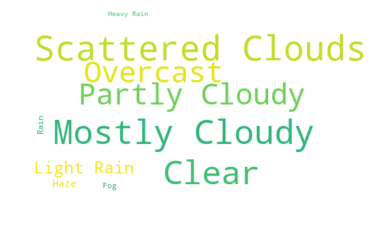

In [196]:
Cond = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(Conditions)
plt.imshow(Cond, interpolation = 'bilinear')
plt.axis("off")

### Get the top 10 frequently occuring wind directions

In [71]:
weather['wind_dir'].value_counts()[:10]

South       1660
SSE         1205
Calm        1186
SE           719
North        574
ESE          497
NNW          472
SSW          343
East         307
Variable     293
Name: wind_dir, dtype: int64

### Build a dictionary of these values

In [86]:
wd = {'South':1660,
'South by South East':1205,
'Calm':1186,
'South East':719,
'North':574,
'East by South East':497,
'North by North West':472,
'South by South West':343,
'East':307,
'Variable':293}

### Build a word cloud for `Wind Direction` to better see the values

(-0.5, 499.5, 299.5, -0.5)

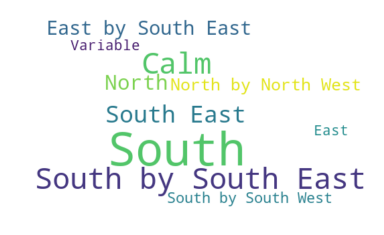

In [199]:
widi = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(wd)
plt.imshow(widi, interpolation = 'bilinear')
plt.axis("off")

### Get a closer look at numbers to find strong relations between numeric variables

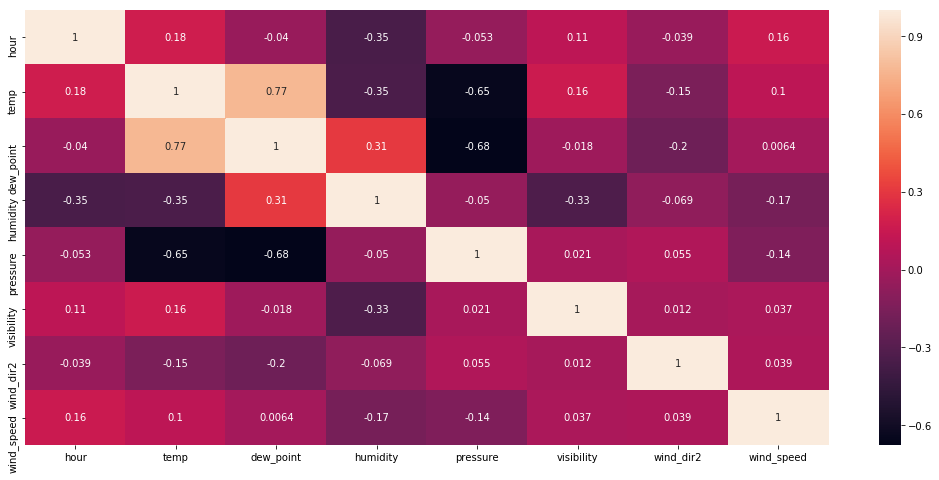

In [124]:
plt.figure(figsize=(18,8))
sns.heatmap(weather.corr(), annot = True)

# Flights  <a class="anchor" id="fly"></a>

[Back To Top](#TOP)

In [19]:
flights.head()

,date,hour,minute,dep,arr,dep_delay,arr_delay,carrier,flight,dest,plane,cancelled,time,dist
0,2011-01-01 12:00:00,14.0,0.0,1400.0,1500.0,0.0,-10.0,AA,428,DFW,N576AA,0,40.0,224
1,2011-01-02 12:00:00,14.0,1.0,1401.0,1501.0,1.0,-9.0,AA,428,DFW,N557AA,0,45.0,224
2,2011-01-03 12:00:00,13.0,52.0,1352.0,1502.0,-8.0,-8.0,AA,428,DFW,N541AA,0,48.0,224
3,2011-01-04 12:00:00,14.0,3.0,1403.0,1513.0,3.0,3.0,AA,428,DFW,N403AA,0,39.0,224
4,2011-01-05 12:00:00,14.0,5.0,1405.0,1507.0,5.0,-3.0,AA,428,DFW,N492AA,0,44.0,224


### Get to know the null values

In [162]:
flights.isnull().sum(), flights.shape

(date            0
 hour         2905
 minute       2905
 dep          2905
 arr          3066
 dep_delay    2905
 arr_delay    3622
 carrier         0
 flight          0
 dest            0
 plane         795
 cancelled       0
 time         3622
 dist            0
 dtype: int64, (227496, 14))

### Here the flights dataset is huge enough to drop null values  
### without introducing big difference in information at hand

In [163]:
flights.dropna(axis = 0, inplace = True)

In [164]:
flights['cancelled'].value_counts()

0    223874
Name: cancelled, dtype: int64

In [165]:
flights.drop(columns = 'cancelled', inplace = True)

### Now the `Flights` dataset is all set and clean

In [166]:
flights.isnull().sum(), flights.shape

(date         0
 hour         0
 minute       0
 dep          0
 arr          0
 dep_delay    0
 arr_delay    0
 carrier      0
 flight       0
 dest         0
 plane        0
 time         0
 dist         0
 dtype: int64, (223874, 13))

In [167]:
flights.head()

,date,hour,minute,dep,arr,dep_delay,arr_delay,carrier,flight,dest,plane,time,dist
0,2011-01-01 12:00:00,14.0,0.0,1400.0,1500.0,0.0,-10.0,AA,428,DFW,N576AA,40.0,224
1,2011-01-02 12:00:00,14.0,1.0,1401.0,1501.0,1.0,-9.0,AA,428,DFW,N557AA,45.0,224
2,2011-01-03 12:00:00,13.0,52.0,1352.0,1502.0,-8.0,-8.0,AA,428,DFW,N541AA,48.0,224
3,2011-01-04 12:00:00,14.0,3.0,1403.0,1513.0,3.0,3.0,AA,428,DFW,N403AA,39.0,224
4,2011-01-05 12:00:00,14.0,5.0,1405.0,1507.0,5.0,-3.0,AA,428,DFW,N492AA,44.0,224


In [168]:
fl = flights.drop(columns = ['hour', 'minute'])

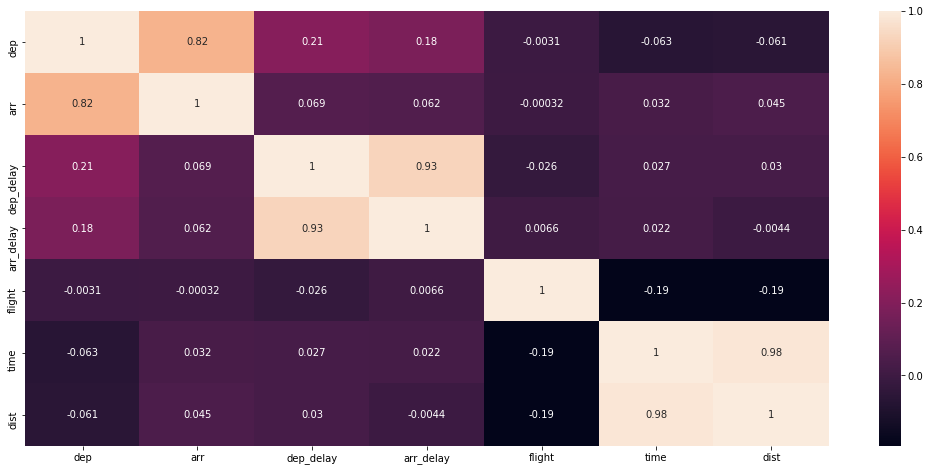

In [170]:
plt.figure(figsize = (18, 8))
sns.heatmap(fl.corr(), annot = True)

# Planes  <a class="anchor" id="plane"></a>

[Back To Top](#TOP)

In [171]:
planes.head()

,plane,year,mfr,model,no.eng,no.seats,speed,engine,type
0,N576AA,1991.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,NaN,Turbo-fan,Fixed wing multi engine
1,N557AA,1993.0,MARZ BARRY,KITFOX IV,1.0,2,NaN,Reciprocating,Fixed wing single engine
2,N403AA,1974.0,RAVEN,S55A,NaN,1,60.0,None,Balloon
3,N492AA,1989.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,NaN,Turbo-fan,Fixed wing multi engine
4,N262AA,1985.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,NaN,Turbo-fan,Fixed wing multi engine


### Get to know where null values are

In [172]:
planes.isnull().sum(), planes.shape

(plane          0
 year          92
 mfr            0
 model          0
 no.eng         2
 no.seats       0
 speed       2794
 engine         0
 type           0
 dtype: int64, (2853, 9))

### It's too obvious that `Speed` column is almost all null, let's drop it

In [173]:
planes.drop(columns = ['speed'], inplace = True)

### As we don't have more information about `year` or `no.eng` attributes,  
### we can't simply fill the null values with the mean or median  
### So, I will drop them in order not to introduce misleading values for our analysis

In [174]:
planes.dropna(axis = 0, inplace = True)

### Now our `planes` dataset is 

In [175]:
planes.isnull().sum(), planes.shape

(plane       0
 year        0
 mfr         0
 model       0
 no.eng      0
 no.seats    0
 engine      0
 type        0
 dtype: int64, (2760, 8))

In [176]:
planes.head()

,plane,year,mfr,model,no.eng,no.seats,engine,type
0,N576AA,1991.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,Turbo-fan,Fixed wing multi engine
1,N557AA,1993.0,MARZ BARRY,KITFOX IV,1.0,2,Reciprocating,Fixed wing single engine
3,N492AA,1989.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,Turbo-fan,Fixed wing multi engine
4,N262AA,1985.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,Turbo-fan,Fixed wing multi engine
5,N493AA,1989.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,Turbo-fan,Fixed wing multi engine


In [193]:
model = {'737-7H4':353,'A320-232':226,'CL-600-2B19':185,
         'CL-600-2C10':138,'737-3H4':137,'MD-88':117,
         '737-824':117,'EMB-145LR':112,'EMB-145XR':104,'717-200':86}

(-0.5, 499.5, 299.5, -0.5)

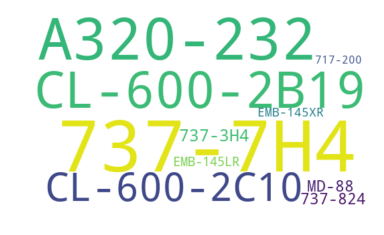

In [230]:
modl = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling='auto',
               normalize_plurals=False).generate_from_frequencies(model)
plt.imshow(modl, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
mfr = {'BOEING':1273,'BOMBARDIER INC':371,'EMBRAER':303,
       'AIRBUS INDUSTRIE':297,'AIRBUS':196,'MCDONNELL DOUGLAS':150,
       'MCDONNELL DOUGLAS AIRCRAFT CO':103,'MCDONNELL DOUGLAS CORPORATION':14,
       'CANADAIR':12,'CESSNA':9}

(-0.5, 499.5, 299.5, -0.5)

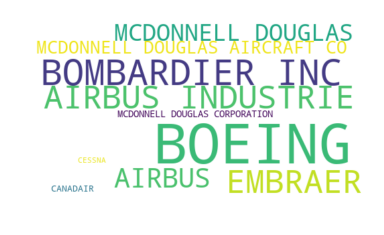

In [201]:
mnfr = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(mfr)
plt.imshow(mnfr, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
n_eng = {'Two Engines':2725,'One Engine':32,'Three Engines':2,'Four Engines':1}

(-0.5, 499.5, 299.5, -0.5)

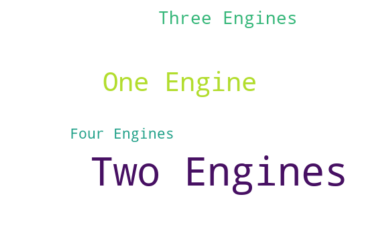

In [227]:
neng = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=0.35,
               normalize_plurals=False).generate_from_frequencies(n_eng)
plt.imshow(neng, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
n_seat = {'149 Seats':547,'55 Seats':425,'140 Seats':353,'200 Seats':226,'80 Seats':138,'142 Seats':35,
          '178 Seats':121,'100 Seats':103,'172 Seats':99,'179 Seats':93}

(-0.5, 499.5, 299.5, -0.5)

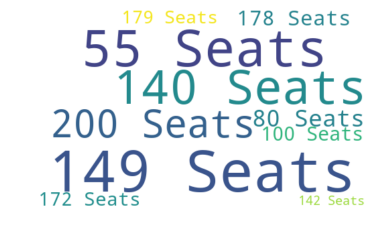

In [221]:
seats = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling='auto',
               normalize_plurals=False).generate_from_frequencies(n_seat)
plt.imshow(seats, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
t_eng = {'Turbo-fan':2248,'Turbo-jet':474,'Reciprocating':32,'Turbo-shaft':3,'4 Cycle':2,'Turbo-prop':1}

(-0.5, 499.5, 299.5, -0.5)

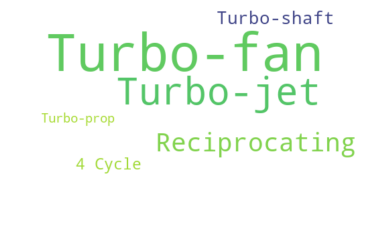

In [214]:
engt = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=0.35,
               normalize_plurals=False).generate_from_frequencies(t_eng)
plt.imshow(engt, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
types = {'Fixed wing multi engine':2728,'Fixed wing single engine':27,'Rotorcraft':4,'Weight-shift-control':1}

(-0.5, 499.5, 299.5, -0.5)

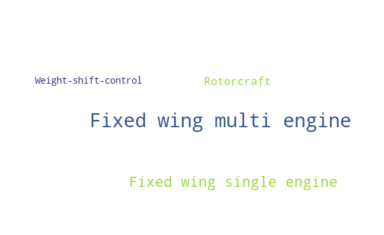

In [225]:
tps = WordCloud(background_color="white",width=500,height=300, max_words=10,relative_scaling=.25,
               normalize_plurals=False).generate_from_frequencies(types)
plt.imshow(tps, interpolation = 'bilinear')
plt.axis("off")

[Back To Top](#TOP)